/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


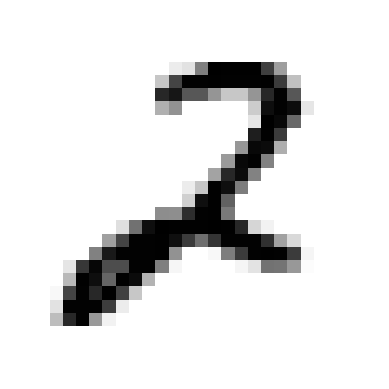

Label of the 36,001st digit: 2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Prediction for the 36,001st digit: 2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-validation accuracy: 0.9065333333333333
Actual label: 4, Predicted: 4


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


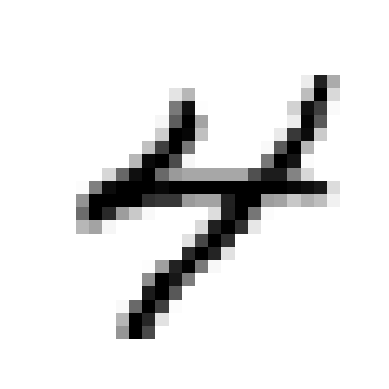

Actual label: 8, Predicted: 8


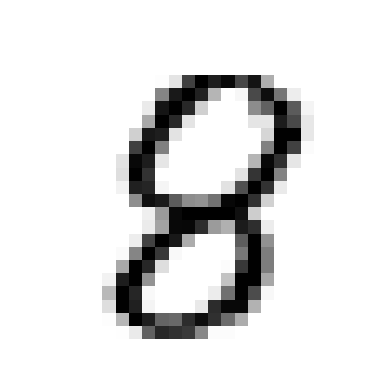

Actual label: 5, Predicted: 5


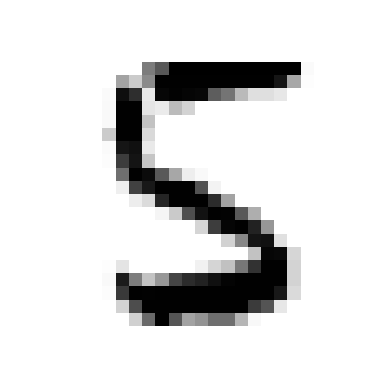

Actual label: 0, Predicted: 0


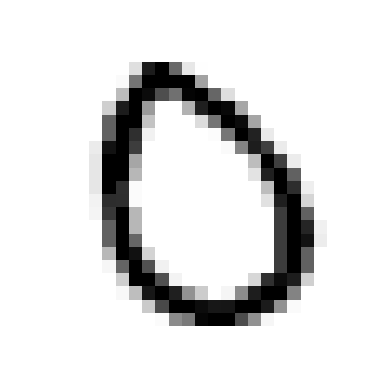

Actual label: 8, Predicted: 8


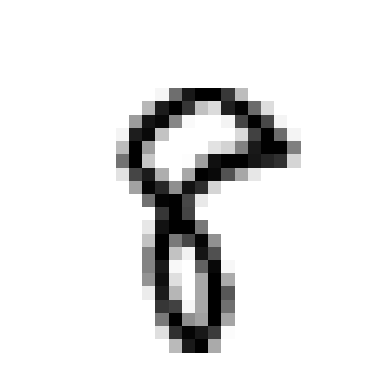

Actual label: 9, Predicted: 9


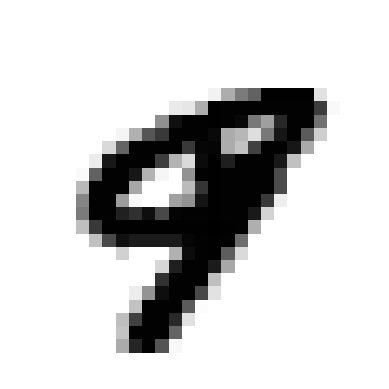

Actual label: 0, Predicted: 0


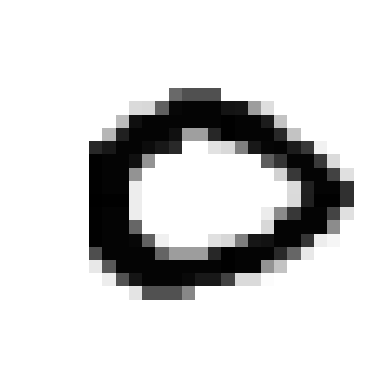

Actual label: 3, Predicted: 3


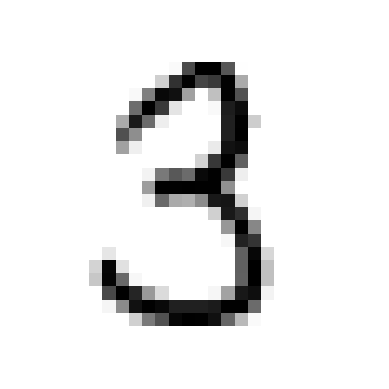

Actual label: 6, Predicted: 6


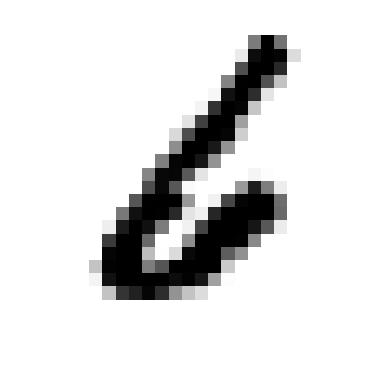

Actual label: 9, Predicted: 9


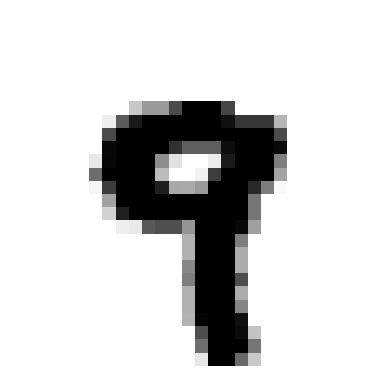

Test set accuracy: 0.9162


In [4]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import matplotlib.pyplot as plt
import random

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', as_frame=False)
x, y = mnist['data'], mnist['target']

# Convert to numpy arrays
x = np.array(x)
y = np.array(y).astype(np.int64)  # Ensure target labels are integers

# Visualize a sample digit
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap='binary', interpolation='nearest')
    plt.axis('off')
    plt.show()

# Display the 36,001st digit
plot_digit(x[36001])
print("Label of the 36,001st digit:", y[36001])

# Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=10000, random_state=42)

# Initialize and train the Logistic Regression model for all digits
clf = LogisticRegression(max_iter=1000, tol=0.1, random_state=42)
clf.fit(x_train, y_train)

# Predict the label for the sample digit
some_digit = x[36001].reshape(1, -1)
prediction = clf.predict(some_digit)
print("Prediction for the 36,001st digit:", prediction[0])

# Evaluate the model using cross-validation
cv_scores = cross_val_score(clf, x_train, y_train, cv=3, scoring='accuracy')
print("Cross-validation accuracy:", cv_scores.mean())

# Predict the label for several sample digits
num_samples = 10  # Number of samples to test
indices = random.sample(range(len(x_test)), num_samples)

for idx in indices:
    digit_image = x_test[idx].reshape(1, -1)
    prediction = clf.predict(digit_image)
    actual_label = y_test[idx]

    print(f"Actual label: {actual_label}, Predicted: {prediction[0]}")
    plot_digit(x_test[idx])

# Evaluate the model on the entire test set
test_accuracy = clf.score(x_test, y_test)
print("Test set accuracy:", test_accuracy)
